### Developer: Mayana Mohsin Khan

# Section A: Model Complexity and Model Selection

## Leave-one-out-Cross-Validation (LooCV)

### Loading Packages

In [7]:
# loading packages
library(reshape2)  
library(ggplot2) 
library(corrplot)

### Loading Data

In [8]:
# load the datasets
train <- read.csv('Task1A_train.csv')
train.data <- data.matrix(train[,1])

# splitting the data into predictiors and labels
train.label <- data.matrix(train[,2])
test <- read.csv('Task1A_test.csv')
test.data <- data.matrix(test[,1])
test.label <- data.matrix(test[,2])

#### Knn Regressor

In [9]:
# Funcion to implement a knn regressor
knn <- function(train.data, train.label, test.data, K=3, distance = 'manhattan'){
    # Convert the train and test data as a matrix
    train.data <- as.matrix(train.data)
    train.label<- as.matrix(train.label)
    test.data <- as.matrix(test.data)
    
    # length of the training samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)

    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), 
                           method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    
    # if lenght of training samples is 1, transform the the distance matrix
    if(test.len == 1){
        dist <- t(dist)
    }

    # for each test sample
    for (i in 1:test.len){
        # get the index of the sample 
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        # find nearest training samples
        y <- train.label[nn,]
        # calculate the test labels
        test.label[i] <- mean(y)
    }
    
    ## return the class test labels as output
    return (test.label)
}

### I.  Implementing a LooCV.

The following steps are prefored in creave a LooCV:
* Randomly shuffle the traning samples.
* Create the folds.
* Loop to the folds.
* Calculate the MSE using $mean(actual-predicted)^2$.
* Store the MSE as a matrix.

In [10]:
# function to creave LooCV
cv <- function(train.data, train.label, K , numfolds){
    # creathe the traning sample length
    N = nrow(train.data)
    
    # randomly sample the index of training data
    Index <- sample(N) 
    
    # create training data and label from the sample index
    train.data <- train.data[Index,]
    train.label <- train.label[Index,]
    
    # create folds of training sample size
    folds <- cut(seq(1,N), breaks = numfolds, labels = FALSE)
    
    # matrix to store loss error
    loocv_err <- matrix(NA, nrow = numfolds, ncol = N)
    
    # cross validation
    for(i in 1:numfolds) {
        
        # splitting the data based on fold index
        fold <- folds[i]
        
        # creating training and testing data data from splitted samples
        data.train <- train.data[-fold]
        data.test <- train.data[fold]
        label.train <- train.label[-fold]
        label.test <- train.label[fold]
        
        # predict using the knn function
        pred <- knn(data.train, label.train, data.test, K)
        
        # store the loss MSE error
        loocv_err[i,] <- (label.test - pred)^2
    }
    # Storing MSE's into a matrix and transposing it
    loocv_avg_err <- t(colMeans(loocv_err))
    
    # return the error matrix
    return(loocv_avg_err)
}

### II. Using the training data in Question 1, run your Leave-One-Out CV. Change the value of K=1,..,15 in your KNN regressor, and for each K compute the average of error values you have got for folds. Plot the average of error values versus 1/K for K=1,..,15 in your KNN regressor.

In [11]:
# Create a empty dataframe to store MSE
miss <- data.frame('K'=1:15, 'Avg_err'=rep(0,15))

# calculate the MSE for k in 1 to 15
for (k in 1:15){
    miss[k,'Avg_err'] <- cv(train.data, train.label, k, nrow(train.data))
}

Warning message in x[[jj]][iseq] <- vjj:
"number of items to replace is not a multiple of replacement length"Warning message in x[[jj]][iseq] <- vjj:
"number of items to replace is not a multiple of replacement length"Warning message in x[[jj]][iseq] <- vjj:
"number of items to replace is not a multiple of replacement length"Warning message in x[[jj]][iseq] <- vjj:
"number of items to replace is not a multiple of replacement length"Warning message in x[[jj]][iseq] <- vjj:
"number of items to replace is not a multiple of replacement length"Warning message in x[[jj]][iseq] <- vjj:
"number of items to replace is not a multiple of replacement length"Warning message in x[[jj]][iseq] <- vjj:
"number of items to replace is not a multiple of replacement length"Warning message in x[[jj]][iseq] <- vjj:
"number of items to replace is not a multiple of replacement length"Warning message in x[[jj]][iseq] <- vjj:
"number of items to replace is not a multiple of replacement length"Warning message in 

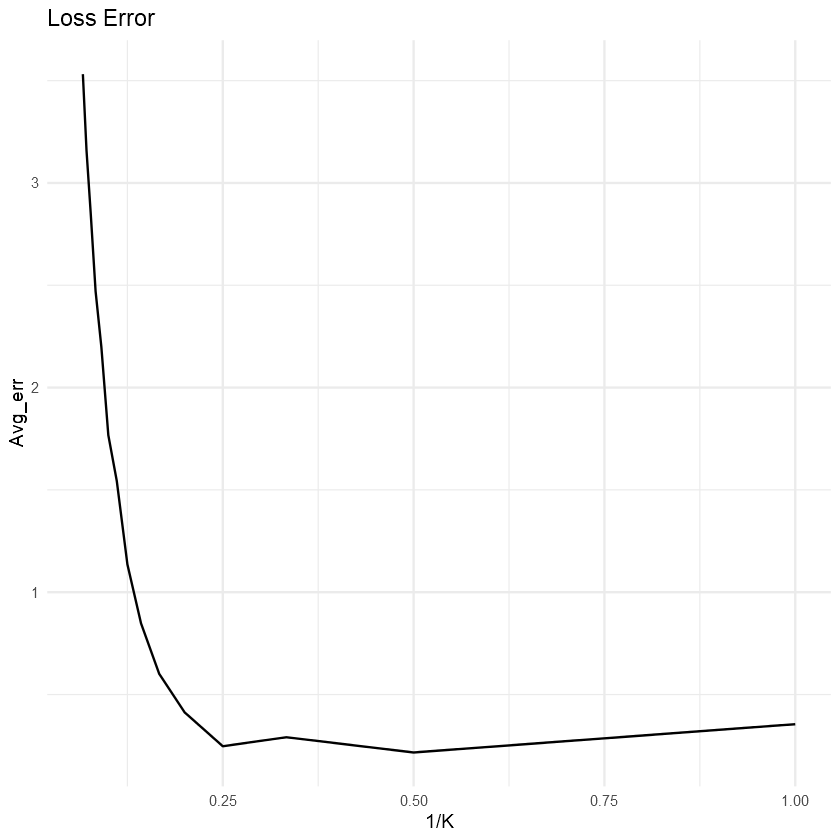

In [12]:
ggplot(data=miss, aes(x= 1/K, y= Avg_err)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Loss Error")

### III. Report (in your Jupyter Notebook file) the optimum value for K based on your plot for this Leave-One-Out cross validation in the previous part (Part II).
#### ANSWER

It is obsorvered that, when K is `2`. We use MSE to calculate the MSE in LooCV.